In [1]:
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt


Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'C:\\Users\\legui\\AppData\\Local\\Temp\\try_flags_6ralo2i1.c:4:19: fatal error: cudnn.h: No such file or directory\r\ncompilation terminated.\r\n'
Mapped name None to device cuda: GeForce RTX 2070 SUPER (0000:01:00.0)


In [2]:
geo_model = gp.create_model('Perth_Basin')

In [3]:
gp.init_data(geo_model,
             extent = [337000, 400000, 6640000, 6710000, -18000, 1000],
             resolution = [100,100,100],
             path_i = os.pardir+"/data/input_data/perth_basin/Paper_GU2F_sc_faults_topo_Points.csv", 
             path_o = os.pardir+"/data/input_data/perth_basin/Paper_GU2F_sc_faults_topo_Foliations.csv")



Active grids: ['regular']


Perth_Basin  2020-03-31 09:48

In [4]:
geo_model.surfaces

surface          series  order_surfaces  isActive    color  id
0             Lesueur  Default series               1      True  #015482   1
1             Permian  Default series               2      True  #9f0052   2
2    Woodada_Kockatea  Default series               3      True  #ffbe00   3
3          Yarragadee  Default series               4      True  #728f02   4
4             Eneabba  Default series               5      True  #443988   5
5          Cattamarra  Default series               6      True  #ff3f20   6
6               Cadda  Default series               7      True  #5DA629   7
7          Cretaceous  Default series               8      True  #4878d0   8
8             Darling  Default series               9      True  #ee854a   9
9        Urella_North  Default series              10      True  #6acc64  10
10      Eneabba_South  Default series              11      True  #d65f5f  11
11           Coomallo  Default series              12      True  #956cb4  12
12       Hypo_fault_E  Default series              13      True  #8c613c  13
13       Hypo_fault_W  Default series              14      True  #dc7ec0  14
14       Urella_South  Default series              15      True  #797979  15
15  Abrolhos_Transfer  Default series              16      True  #d5bb67  16
16           basement        Basement               1      True  #82c6e2  17

In [5]:
del_surfaces = ['Cadda', 'Woodada_Kockatea', 'Cattamarra']

In [6]:
geo_model.delete_surfaces(del_surfaces, remove_data=True)

surface          series  order_surfaces  isActive    color  id
0             Lesueur  Default series               1      True  #015482   1
1             Permian  Default series               2      True  #9f0052   2
3          Yarragadee  Default series               3      True  #728f02   3
4             Eneabba  Default series               4      True  #443988   4
7          Cretaceous  Default series               5      True  #4878d0   5
8             Darling  Default series               6      True  #ee854a   6
9        Urella_North  Default series               7      True  #6acc64   7
10      Eneabba_South  Default series               8      True  #d65f5f   8
11           Coomallo  Default series               9      True  #956cb4   9
12       Hypo_fault_E  Default series              10      True  #8c613c  10
13       Hypo_fault_W  Default series              11      True  #dc7ec0  11
14       Urella_South  Default series              12      True  #797979  12
15  Abrolhos_Transfer  Default series              13      True  #d5bb67  13
16           basement        Basement               1      True  #82c6e2  14

In [7]:
geo_model.series

order_series BottomRelation  isActive
Default series             1        Erosion      True
Basement                   2        Erosion     False

In [8]:
gp.map_series_to_surfaces(geo_model, 
              {"fault_Abrolhos_Transfer": ["Abrolhos_Transfer"],
               "fault_Coomallo": ["Coomallo"],
               "fault_Eneabba_South": ["Eneabba_South"],
               "fault_Hypo_fault_W": ["Hypo_fault_W"],
               "fault_Hypo_fault_E": ["Hypo_fault_E"],
               "fault_Urella_North": ["Urella_North"],
               "fault_Urella_South": ["Urella_South"],
               "fault_Darling": ["Darling"],
               "Sedimentary_Series": ['Cretaceous', 
                                      'Yarragadee', 
                                      'Eneabba',
                                      'Lesueur',
                                      'Permian']
              })


surface                   series  order_surfaces  isActive    color  id
15  Abrolhos_Transfer  fault_Abrolhos_Transfer               1      True  #d5bb67   1
11           Coomallo           fault_Coomallo               1      True  #956cb4   2
10      Eneabba_South      fault_Eneabba_South               1      True  #d65f5f   3
13       Hypo_fault_W       fault_Hypo_fault_W               1      True  #dc7ec0   4
12       Hypo_fault_E       fault_Hypo_fault_E               1      True  #8c613c   5
9        Urella_North       fault_Urella_North               1      True  #6acc64   6
14       Urella_South       fault_Urella_South               1      True  #797979   7
8             Darling            fault_Darling               1      True  #ee854a   8
0             Lesueur       Sedimentary_Series               1      True  #015482   9
1             Permian       Sedimentary_Series               2      True  #9f0052  10
3          Yarragadee       Sedimentary_Series               3      True  #728f02  11
4             Eneabba       Sedimentary_Series               4      True  #443988  12
7          Cretaceous       Sedimentary_Series               5      True  #4878d0  13
16           basement                 Basement               1      True  #82c6e2  14

In [9]:
geo_model.series

order_series BottomRelation  isActive
fault_Abrolhos_Transfer             1        Erosion      True
fault_Coomallo                      2        Erosion      True
fault_Eneabba_South                 3        Erosion      True
fault_Hypo_fault_W                  4        Erosion      True
fault_Hypo_fault_E                  5        Erosion      True
fault_Urella_North                  6        Erosion      True
fault_Urella_South                  7        Erosion      True
fault_Darling                       8        Erosion      True
Sedimentary_Series                  9        Erosion      True
Basement                           10        Erosion     False

In [10]:
order_series = ["fault_Abrolhos_Transfer",
                "fault_Coomallo",
                "fault_Eneabba_South",
               "fault_Hypo_fault_W",
                "fault_Hypo_fault_E",
              "fault_Urella_North",
              "fault_Darling",
              "fault_Urella_South",
              "Sedimentary_Series", 'Basement']

geo_model.reorder_series(order_series)

order_series BottomRelation  isActive
fault_Abrolhos_Transfer             1        Erosion      True
fault_Coomallo                      2        Erosion      True
fault_Eneabba_South                 3        Erosion      True
fault_Hypo_fault_W                  4        Erosion      True
fault_Hypo_fault_E                  5        Erosion      True
fault_Urella_North                  6        Erosion      True
fault_Darling                       7        Erosion      True
fault_Urella_South                  8        Erosion      True
Sedimentary_Series                  9        Erosion      True
Basement                           10        Erosion     False

Drop input data from the deleted series:

In [11]:
geo_model.surface_points.df.dropna(inplace=True)
geo_model.orientations.df.dropna(inplace=True)

### Select which series are faults

In [12]:
geo_model.faults

isFault  isFinite
fault_Abrolhos_Transfer    False     False
fault_Coomallo             False     False
fault_Eneabba_South        False     False
fault_Hypo_fault_W         False     False
fault_Hypo_fault_E         False     False
fault_Urella_North         False     False
fault_Darling              False     False
fault_Urella_South         False     False
Sedimentary_Series         False     False
Basement                   False     False

In [13]:
geo_model.set_is_fault(["fault_Abrolhos_Transfer",
                        "fault_Coomallo",
                        "fault_Eneabba_South",
                        "fault_Hypo_fault_W",
                        "fault_Hypo_fault_E",
                        "fault_Urella_North",
                        "fault_Darling",
                        "fault_Urella_South"])

Fault colors changed. If you do not like this behavior, set change_color to False.


isFault  isFinite
fault_Abrolhos_Transfer     True     False
fault_Coomallo              True     False
fault_Eneabba_South         True     False
fault_Hypo_fault_W          True     False
fault_Hypo_fault_E          True     False
fault_Urella_North          True     False
fault_Darling               True     False
fault_Urella_South          True     False
Sedimentary_Series         False     False
Basement                   False     False

## Fault Network 

In [14]:
geo_model.faults.faults_relations_df

fault_Abrolhos_Transfer  fault_Coomallo  \
fault_Abrolhos_Transfer                    False           False   
fault_Coomallo                             False           False   
fault_Eneabba_South                        False           False   
fault_Hypo_fault_W                         False           False   
fault_Hypo_fault_E                         False           False   
fault_Urella_North                         False           False   
fault_Darling                              False           False   
fault_Urella_South                         False           False   
Sedimentary_Series                         False           False   
Basement                                   False           False   

                         fault_Eneabba_South  fault_Hypo_fault_W  \
fault_Abrolhos_Transfer                False               False   
fault_Coomallo                         False               False   
fault_Eneabba_South                    False               False   
fault_Hypo_fault_W                     False               False   
fault_Hypo_fault_E                     False               False   
fault_Urella_North                     False               False   
fault_Darling                          False               False   
fault_Urella_South                     False               False   
Sedimentary_Series                     False               False   
Basement                               False               False   

                         fault_Hypo_fault_E  fault_Urella_North  \
fault_Abrolhos_Transfer               False               False   
fault_Coomallo                        False               False   
fault_Eneabba_South                   False               False   
fault_Hypo_fault_W                    False               False   
fault_Hypo_fault_E                    False               False   
fault_Urella_North                    False               False   
fault_Darling                         False               False   
fault_Urella_South                    False               False   
Sedimentary_Series                    False               False   
Basement                              False               False   

                         fault_Darling  fault_Urella_South  \
fault_Abrolhos_Transfer          False               False   
fault_Coomallo                   False               False   
fault_Eneabba_South              False               False   
fault_Hypo_fault_W               False               False   
fault_Hypo_fault_E               False               False   
fault_Urella_North               False               False   
fault_Darling                    False               False   
fault_Urella_South               False               False   
Sedimentary_Series               False               False   
Basement                         False               False   

                         Sedimentary_Series  Basement  
fault_Abrolhos_Transfer                True      True  
fault_Coomallo                         True      True  
fault_Eneabba_South                    True      True  
fault_Hypo_fault_W                     True      True  
fault_Hypo_fault_E                     True      True  
fault_Urella_North                     True      True  
fault_Darling                          True      True  
fault_Urella_South                     True      True  
Sedimentary_Series                    False     False  
Basement                              False     False

In [15]:
fr = geo_model.faults.faults_relations_df.values

In [16]:
fr[:, :-2] = False
fr

array([[False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
geo_model.set_fault_relation(fr)

fault_Abrolhos_Transfer  fault_Coomallo  \
fault_Abrolhos_Transfer                    False           False   
fault_Coomallo                             False           False   
fault_Eneabba_South                        False           False   
fault_Hypo_fault_W                         False           False   
fault_Hypo_fault_E                         False           False   
fault_Urella_North                         False           False   
fault_Darling                              False           False   
fault_Urella_South                         False           False   
Sedimentary_Series                         False           False   
Basement                                   False           False   

                         fault_Eneabba_South  fault_Hypo_fault_W  \
fault_Abrolhos_Transfer                False               False   
fault_Coomallo                         False               False   
fault_Eneabba_South                    False               False   
fault_Hypo_fault_W                     False               False   
fault_Hypo_fault_E                     False               False   
fault_Urella_North                     False               False   
fault_Darling                          False               False   
fault_Urella_South                     False               False   
Sedimentary_Series                     False               False   
Basement                               False               False   

                         fault_Hypo_fault_E  fault_Urella_North  \
fault_Abrolhos_Transfer               False               False   
fault_Coomallo                        False               False   
fault_Eneabba_South                   False               False   
fault_Hypo_fault_W                    False               False   
fault_Hypo_fault_E                    False               False   
fault_Urella_North                    False               False   
fault_Darling                         False               False   
fault_Urella_South                    False               False   
Sedimentary_Series                    False               False   
Basement                              False               False   

                         fault_Darling  fault_Urella_South  \
fault_Abrolhos_Transfer          False               False   
fault_Coomallo                   False               False   
fault_Eneabba_South              False               False   
fault_Hypo_fault_W               False               False   
fault_Hypo_fault_E               False               False   
fault_Urella_North               False               False   
fault_Darling                    False               False   
fault_Urella_South               False               False   
Sedimentary_Series               False               False   
Basement                         False               False   

                         Sedimentary_Series  Basement  
fault_Abrolhos_Transfer                True      True  
fault_Coomallo                         True      True  
fault_Eneabba_South                    True      True  
fault_Hypo_fault_W                     True      True  
fault_Hypo_fault_E                     True      True  
fault_Urella_North                     True      True  
fault_Darling                          True      True  
fault_Urella_South                     True      True  
Sedimentary_Series                    False     False  
Basement                              False     False

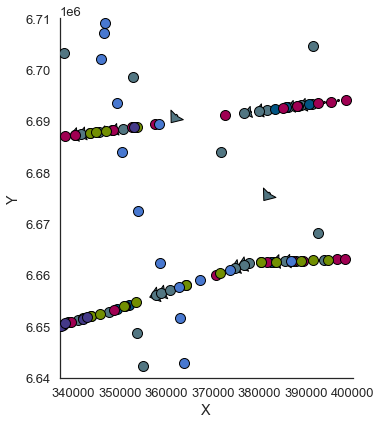

In [18]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z')

[-2800.  1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 3.37315000e+05,  6.64035000e+06, -1.79050000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.77150000e+04],
       [ 3.37315000e+05,  6.64035000e+06, -1.75250000e+04],
       ...,
       [ 3.98425000e+05,  6.70965000e+06, -1.06577228e+03],
       [ 3.99055000e+05,  6.70965000e+06, -1.21291382e+03],
       [ 3.99685000e+05,  6.70965000e+06, -1.24330368e+03]])

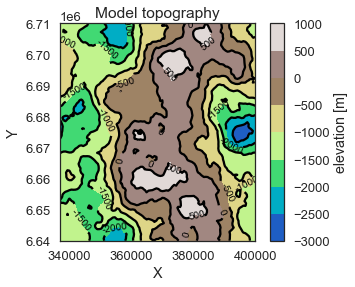

In [19]:
geo_model.set_topography(source='random')

In [20]:
#gp.plot.plot_3D(geo_model)

In [21]:
interp_data = gp.set_interpolation_data(geo_model,  
                                        compile_theano=True,
                                        theano_optimizer='fast_run', gradient=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  8
Compilation Done!
Kriging values: 
                                          values
range                                   96072.9
$C_o$                               2.19762e+08
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
gp.compute_model(geo_model)

C:\Users\legui\miniconda3\envs\gp-dev\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.20261e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\legui\miniconda3\envs\gp-dev\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.88533e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\legui\miniconda3\envs\gp-dev\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.99285e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\legui\miniconda3\envs\gp-dev\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.53202e-10): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
C:\Users\legui\miniconda3\envs\gp-dev\lib\site-packages\theano\tensor\slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=2.56816e-10): result may not be accurate.


Lithology ids 
  [14. 14. 14. ... 14. 14. 13.] 

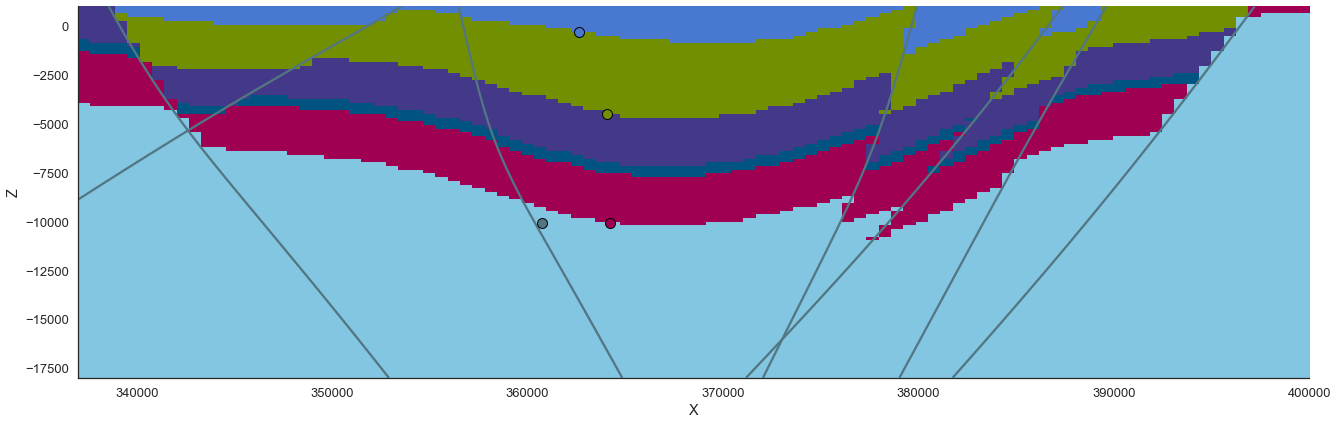

In [23]:
gp.plot.plot_section(geo_model, 25)

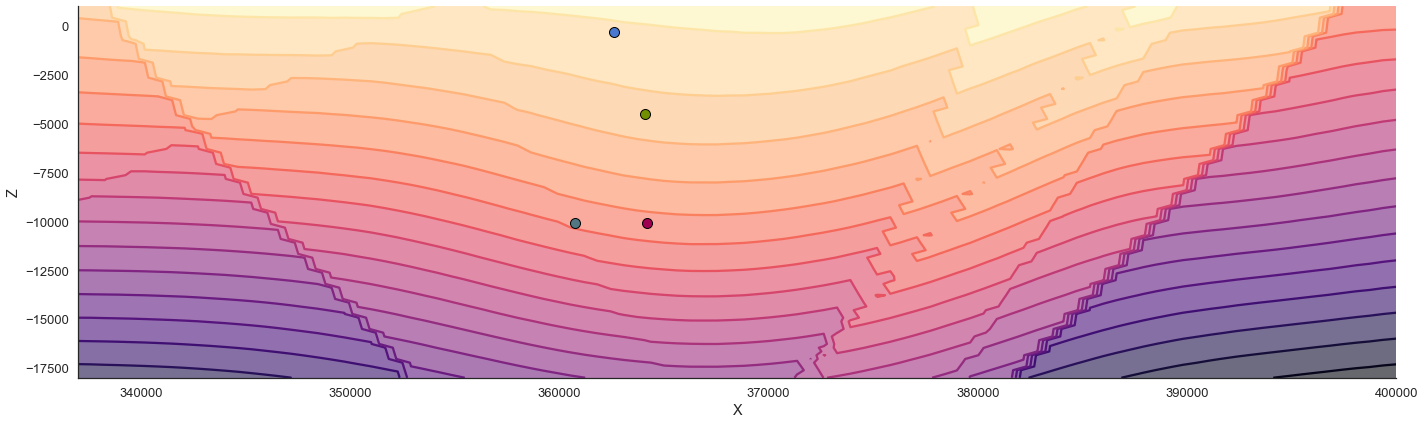

In [24]:
gp.plot.plot_scalar_field(geo_model, 25, series=-1)

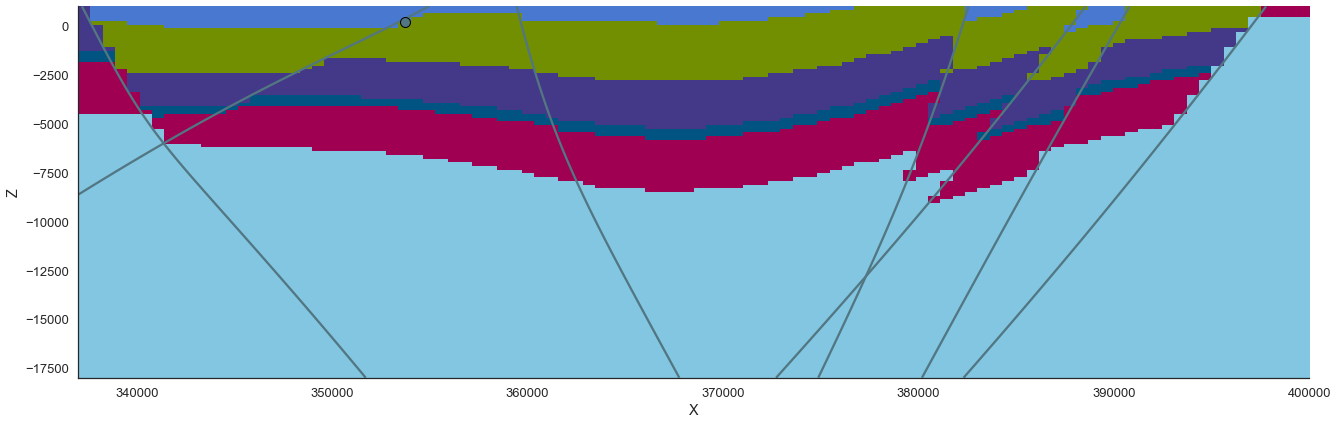

In [25]:
gp.plot.plot_section(geo_model, 12, direction="y", show_data=True)

In [32]:
gp.plot.export_to_vtk(geo_model, path= 'perth_basin_Hard')

True

In [26]:
gp.plot.plot_3D(geo_model, render_data=True, bg_color=(1,1,1))

closing vtk


## Times

#### Fast run
- 1M voxels:
  + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  15 s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)   
  + GPU (4gb) not enough memmory
  + Ceres 1M voxels 2080 851 ms
  
- 250k voxels
    + GPU 1050Ti: 3.11 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  2.27 s ± 47.3 ms
     + 
    
#### Fast Compile
- 250k voxels
    + GPU 1050Ti: 3.7 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
    + CPU: intel® Core™ i7-7700HQ CPU @ 2.80GHz × 8  14.2 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

    

In [27]:
# %%timeit
# gp.compute_model(geo_model)

In [28]:
# ver = np.load('ver.npy')
# sim = np.load('sim.npy')
# lith_block = np.load('lith.npy')

In [29]:
# Not updated to GemPy v2 yet
#ste = gp.steno3D(geo_data, 'PerthBasin')
# ste.plot3D_steno_grid(lith_block)
# ste.plot3D_steno_surface(ver, sim)
# ste.proj.upload()